In [1]:
import pandas as pd
import calendar
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
matplotlib.pyplot.viridis()
%matplotlib inline

In [2]:
austin_2019=pd.read_csv("Crime_Reports.csv")

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
austin_crime_new=austin_2019.drop(['UCR Category','Clearance Date','Clearance Status','Census Tract','PRA','APD District','APD Sector','Council District'],axis=1)

In [4]:
austin_crime_new['Occurred Date Time']=pd.to_datetime(austin_crime_new['Occurred Date Time'])

In [28]:
Crime_count_per_years=austin_crime_new['Occurred Date Time'].dt.year.value_counts().reset_index()
Crime_count_per_years.columns=['Year','Crime_count']
Crime_count_per_years.Year=Crime_count_per_years.Year.astype(int)
Crime_count_per_years.sort_values(by='Year',inplace=True)
Crime_count_per_2009_to_2019=Crime_count_per_years.iloc[6:17,:]
Crime_count_2009_to_2019=Crime_count_per_2009_to_2019.reset_index(drop=True)


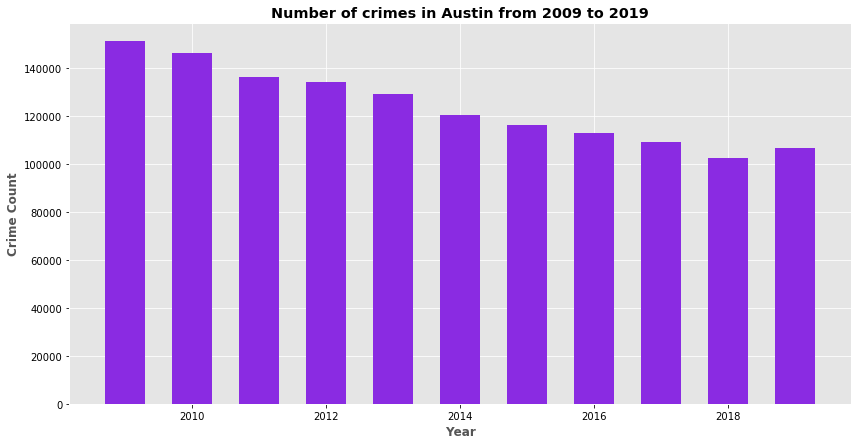

In [29]:
matplotlib.style.use('ggplot')

x=Crime_count_2009_to_2019.Year
y=Crime_count_2009_to_2019.Crime_count
plt.figure(figsize=(14,7))
plt.bar(x,y,width=0.6,color="blueviolet")
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

plt.title('Number of crimes in Austin from 2009 to 2019',fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Crime Count',fontweight='bold')
plt.show()

#### This bar graph represents the number of crimes in Austin from 2009 to 2019

In [30]:
austin_2019= austin_crime_new[(austin_crime_new['Occurred Date Time'] >= '01/01/2019') & (austin_crime_new['Occurred Date Time'] <= '12/31/2019')]
austin_2019.shape

(106137, 19)

In [31]:
Crime_count_for_catogery=austin_2019['Highest Offense Description'].value_counts().reset_index()
Crime_count_for_catogery.columns = ['Category', 'Crime_count_category']


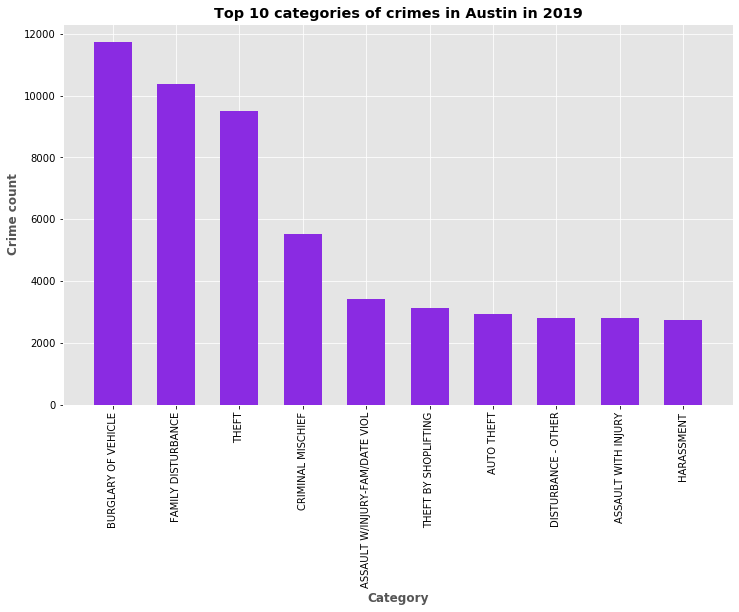

In [32]:
x=Crime_count_for_catogery.loc[0:9,'Category']
y=Crime_count_for_catogery.loc[0:9,'Crime_count_category']


plt.figure(figsize=(12,7))
plt.bar(x,y,width=0.6,color='blueviolet')
plt.tick_params(rotation=90,axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

plt.title('Top 10 categories of crimes in Austin in 2019',fontweight='bold')
plt.xlabel('Category',fontweight='bold')
plt.ylabel('Crime count',fontweight='bold')
plt.show()

#### This bar graph represents the highest 10 categories of crimes in Austin in 2019

In [33]:
austin_2019['Month']=austin_2019.loc[:,'Occurred Date Time'].dt.month

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
Crime_count_per_month=austin_2019['Month'].value_counts().reset_index()
Crime_count_per_month.columns = ['Month', 'Crime_count']
Crime_count_per_month.sort_values(by=['Month'],inplace=True)
Crime_count_per_month.Month=Crime_count_per_month.Month.apply(lambda x: calendar.month_abbr[x])
Crime_count_per_month= Crime_count_per_month.reset_index(drop=True)


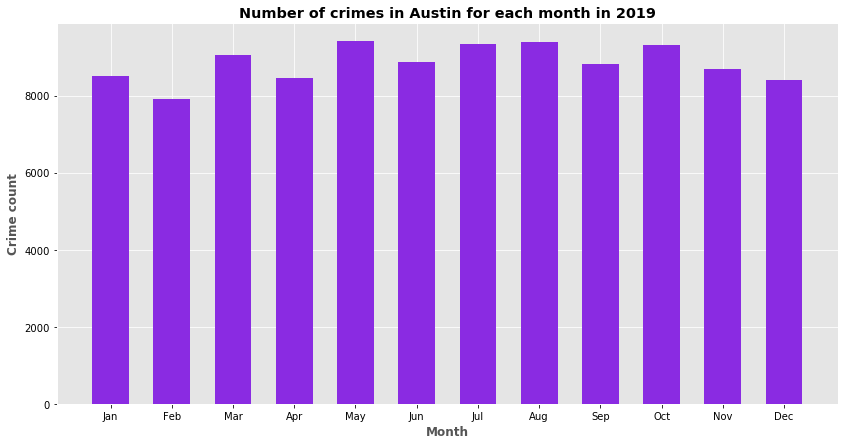

In [35]:
matplotlib.style.use('ggplot')

x=Crime_count_per_month.Month
y=Crime_count_per_month.Crime_count

plt.figure(figsize=(14,7))
plt.bar(x,y,width=0.6,color='blueviolet')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

plt.title('Number of crimes in Austin for each month in 2019',fontweight='bold')
plt.xlabel('Month',fontweight='bold')
plt.ylabel('Crime count',fontweight='bold')
plt.show()

#### This bar graph represents the number of crimes in Austin for each month in 2019

In [36]:
austin_2019.count()

Incident Number                106137
Highest Offense Description    106137
Highest Offense Code           106137
Family Violence                106137
Occurred Date Time             106137
Occurred Date                  106137
Occurred Time                  106137
Report Date Time               106137
Report Date                    106137
Report Time                    106137
Location Type                  105857
Address                        106137
Zip Code                       105551
Category Description            39994
X-coordinate                   105721
Y-coordinate                   105721
Latitude                       104313
Longitude                      104313
Location                       104313
Month                          106137
dtype: int64

In [37]:
austin_2019_new= austin_2019[austin_2019['Longitude'].notnull()]


In [38]:
austin_2019['Weekday_name']=austin_2019.loc[:,'Occurred Date Time'].dt.weekday_name
Crime_count_for_Day=austin_2019.groupby('Weekday_name').count().reset_index()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Crime_count_for_Day['Weekday_name'] = pd.Categorical(Crime_count_for_Day['Weekday_name'], categories=cats, ordered=True)
Crime_count_for_Days= Crime_count_for_Day.sort_values('Weekday_name')

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


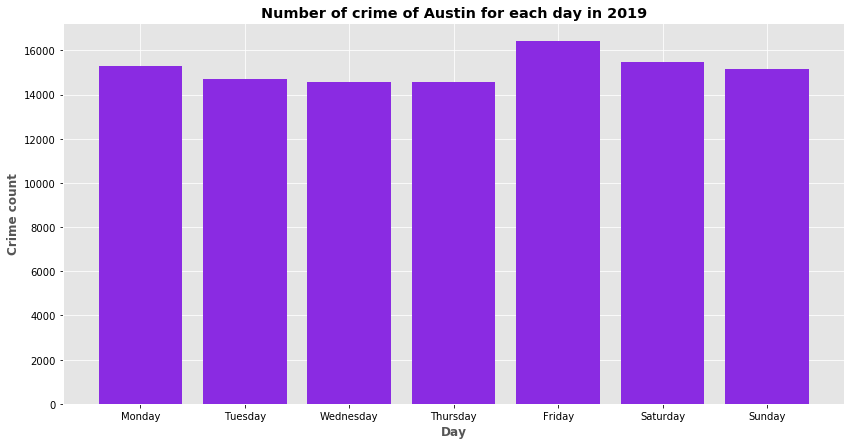

In [39]:
x=Crime_count_for_Days.Weekday_name
y=Crime_count_for_Days['Incident Number']

plt.figure(figsize=(14,7))
plt.bar(x,y,width=0.8,color='blueviolet')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

plt.title('Number of crime of Austin for each day in 2019',fontweight='bold')
plt.xlabel('Day',fontweight='bold')
plt.ylabel('Crime count',fontweight='bold')
plt.show()

#### This bar graph represents the number of crimes in Austin for each day in 2019

In [40]:
Crime_count_per_hour=austin_crime_new['Occurred Date Time'].dt.hour.value_counts().reset_index()
Crime_count_per_hour.columns=['Hours','Crime_count']
Crime_count_per_hour.Hours=Crime_count_per_hour.Hours.astype(int)
Crime_count_per_hour.sort_values(by='Hours',inplace=True)
Crime_count_per_hour=Crime_count_per_hour.reset_index(drop=True)


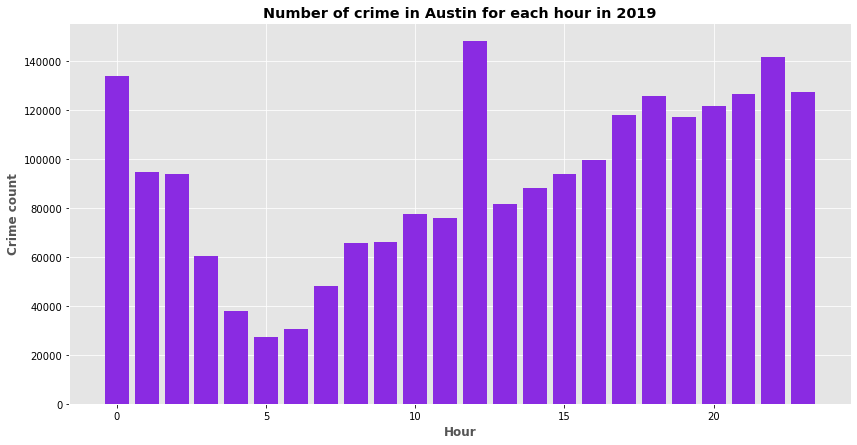

In [41]:
x=Crime_count_per_hour.Hours
y=Crime_count_per_hour.Crime_count

plt.figure(figsize=(14,7))
plt.bar(x,y,width=0.8,color='blueviolet')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

plt.title('Number of crime in Austin for each hour in 2019',fontweight='bold')
plt.xlabel('Hour',fontweight='bold')
plt.ylabel('Crime count',fontweight='bold')
plt.show()

#### This bar graph represents the number of crimes in Austin for each hour in 2019

In [42]:
!pip install folium

In [43]:
new_map=austin_2019_new[austin_2019_new['Highest Offense Description']=='MURDER']
new_map_MURDER=new_map.loc[:,['Highest Offense Description','Latitude','Longitude']].reset_index(drop=True)
new_map_MURDER.head()

,Highest Offense Description,Latitude,Longitude
0,MURDER,30.317962,-97.701906
1,MURDER,30.272280,-97.705896
2,MURDER,30.188051,-97.750372
3,MURDER,30.193554,-97.744785
4,MURDER,30.263522,-97.706768


In [48]:
import folium


In [49]:
from folium import plugins

TX_map=folium.Map(location=[30.2672, -97.7431],zoom_start=10)


crime_type = plugins.MarkerCluster().add_to(TX_map)


for lat, lng, label, in zip(new_map_MURDER['Latitude'], new_map_MURDER['Longitude'], new_map_MURDER['Highest Offense Description']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
        ).add_to(crime_type)

TX_map


#### The locations of the murders in Austin in 2019

#### source: https://catalog.data.gov/dataset/crime-reports